**Librerias para trabajar con la red neuronal y procesamiento de datos**

In [1]:
import os
import numpy as np # type: ignore
from scipy.io import loadmat # type: ignore
import tensorflow as tf # Para red neuronal profunda
import numpy as np
import matplotlib.pyplot as plt
import time # Para tomar el tiempo de entrenamiento de la red
import math

In [2]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

##################################################################################<br>
##################### Convertir matrices de .mat a .npy ##########################<br>
##################################################################################

Directorios de entrada y salida

In [3]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_matlab/codigo_fuente/matrices_complejas_pam_mat' # matrices en formato .mat
input_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_matlab/codigo_fuente/matrices_complejas_vsc_mat' # matrices en formato .mat
output_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_python' # INPUT PARA LA RED
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_python' # OUTPUT O SALIDAS ESPERADAS PARA LA RED

Crear los directorios de salida si no existen

In [4]:
os.makedirs(output_pam_dir, exist_ok=True)
os.makedirs(output_vsc_dir, exist_ok=True)

Funcion para convertir archivos .mat a .npy

In [5]:
total_files=sum(1 for filename in os.listdir(input_pam_dir) if filename.endswith('.mat')) + 1
print("Total de archivos a analizar -> ",total_files-1)

Total de archivos a analizar ->  50


In [6]:
def convert_mat_to_npy(input_dir, output_dir, prefix):
    for i in range(1, total_files):
        mat_file = os.path.join(input_dir, f'{prefix}_noise_{i}.mat')
        npy_file = os.path.join(output_dir, f'{prefix}_noise_{i}.npy')
        
        # Cargar el archivo .mat
        mat_data = loadmat(mat_file)
        
        # Extraer la matriz compleja
        matrix_key = [key for key in mat_data.keys() if not key.startswith('__')][0]
        matrix = mat_data[matrix_key]
        
        # Guardar la matriz en formato .npy
        np.save(npy_file, matrix)

Convertir archivos .mat a .npy para PAM y VSC

In [7]:
convert_mat_to_npy(input_pam_dir, output_pam_dir, 'matrix_complex_pam')
convert_mat_to_npy(input_vsc_dir, output_vsc_dir, 'matrix_complex_vsc')

Conversion a tensor tridimensional 

Directorios de entrada y salida

In [8]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_python'
input_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_python'
output_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Crear directorios de salida si no existen

In [9]:
os.makedirs(output_pam_dir, exist_ok=True)
os.makedirs(output_vsc_dir, exist_ok=True)

####################################################
PREPROCESAMIENTO ANTES DE NORMALIZACIÓN DE MATRICES
####################################################

**CÁLCULO DE LA MEDIA - PAM & VSC (la media se calcula teniendo en cuenta todas las matrices)**

In [ ]:
# Acumuladores para calcular la media de cada matriz (real e imaginaria) y la desviacion estandar

#==========================
#=== PAM SIGNAl ===========
#==========================
#===
# Para media
#===
sumatoria_real_pam = 0
media_real_pam = 0

sumatoria_imag_pam = 0
media_imag_pam = 0
#===
# Para la desviacion estandar
#===
sumatoria_real_cuadrada_pam = 0
sumatoria_imag_cuadrada_pam = 0

desv_real_pam = 0
desv_imag_pam = 0


#==========================
#=== VSC SIGNAl ===========
#==========================
#===
# Para media
#===
sumatoria_real_vsc = 0
media_real_vsc = 0

sumatoria_imag_vsc = 0
media_imag_vsc = 0
#===
# Para la desviacion estandar
#===
sumatoria_real_cuadrada_vsc = 0
sumatoria_imag_cuadrada_vsc = 0

desv_real_vsc = 0
desv_imag_vsc = 0




**FUNCIONES PARA EL CÁLCULO DE LA MEDIA Y DESVIACIÓN ESTÁNDAR PARA LAS SEÑALES [[  PAM  ]]**

In [ ]:
#Entrada: matriz(array bidimensiional nxm), sumatoria_real_pam(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte real de una matriz compleja PAM)
def sumatoria_acumulada_real_pam(matriz):
    global sumatoria_real_pam
    sumatoria_real_pam = sumatoria_real_pam + np.sum(matriz)
    #print(sumatoria_real_pam)

#Entrada: matriz(array bidimensiional nxm), sumatoria_real_cuadrada_pam(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices PAM.
def sumatoria_acumulada_real_cuadrada_pam(matriz):
    global sumatoria_real_cuadrada_pam, media_real_pam
    for fila in matriz:
        for elemento in fila:
            sumatoria_real_cuadrada_pam = sumatoria_real_cuadrada_pam + (elemento - media_real_pam)**2


#=====================================================================================================================================================
#=====================================================================================================================================================


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_pam(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte imaginaria de una matriz compleja PAM)
def sumatoria_acumulada_imag_pam(matriz):
    global sumatoria_imag_pam
    sumatoria_imag_pam = sumatoria_imag_pam + np.sum(matriz)

#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_cuadrada_pam(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices PAM.
def sumatoria_acumulada_imag_cuadrada_pam(matriz):
    global sumatoria_imag_cuadrada_pam, media_imag_pam
    for fila in matriz:
        for elemento in fila:
            sumatoria_imag_cuadrada_pam = sumatoria_imag_cuadrada_pam + (elemento - media_imag_pam)**2




**FUNCIONES PARA EL CÁLCULO DE LA MEDIA Y DESVIACIÓN ESTÁNDAR PARA LAS SEÑALES [[  VSC  ]]**

In [ ]:
#Entrada: matriz(array bidimensiional nxm), sumatoria_real_vsc(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte real de una matriz compleja VSC)
def sumatoria_acumulada_real_vsc(matriz):
    global sumatoria_real_vsc
    sumatoria_real_vsc = sumatoria_real_vsc + np.sum(matriz)


#Entrada: matriz(array bidimensiional nxm), sumatoria_real_cuadrada_vsc(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices VSC.
def sumatoria_acumulada_real_cuadrada_vsc(matriz):
    global sumatoria_real_cuadrada_vsc, media_real_vsc
    for fila in matriz:
        for elemento in fila:
            sumatoria_real_cuadrada_vsc = sumatoria_real_cuadrada_vsc + (elemento - media_real_vsc)**2


#=====================================================================================================================================================
#=====================================================================================================================================================


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_vsc(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte imaginaria de una matriz compleja VSC)
def sumatoria_acumulada_imag_vsc(matriz):
    global sumatoria_imag_vsc
    sumatoria_imag_vsc = sumatoria_imag_vsc + np.sum(matriz)


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_cuadrada_vsc(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices VSC.
def sumatoria_acumulada_imag_cuadrada_vsc(matriz):
    global sumatoria_imag_cuadrada_vsc, media_imag_vsc
    for fila in matriz:
        for elemento in fila:
            sumatoria_imag_cuadrada_vsc = sumatoria_imag_cuadrada_vsc + (elemento - media_imag_vsc)**2




**RECORRER MATRICES & CÁLCULO DE LA MEDIA  MATRIZ PAM (Presion Arterial Media)**

In [ ]:
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_pam_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        #========
        # Normalizacion de los matrices
        #========
        # Sumar todos los datos de las matrices
        sumatoria_acumulada_real_pam(matriz_compleja.real) # para matriz real
        sumatoria_acumulada_imag_pam(matriz_compleja.imag) # para matriz imaginaria



# Se calcula la media real de matrices correspondientes a pam signals: Se suman cada unos de los coeficientes de cada matriz real pam (archivos x filas x columnas)
num_files_input_pam_dir = sum(1 for filename in os.listdir(input_pam_dir) if filename.endswith('.npy'))
filas_matriz, columnas_matriz = matriz_compleja.shape
coefs_totales =  num_files_input_pam_dir * filas_matriz * columnas_matriz # N
media_real_pam = sumatoria_real_pam / coefs_totales # MEDIA REAL
media_imag_pam = sumatoria_imag_pam / coefs_totales # MEDIA IMAGINARIA



**RECORRER MATRICES Y CÁLCULO DE LA DESVIACIÓN ESTÁNDAR || MATRIZ PAM (Presion Arterial Media)**

In [ ]:
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_pam_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Calculo de sumatoria(x - u)^2 - matriz real
        sumatoria_acumulada_real_cuadrada_pam(matriz_compleja.real)
        # Calculo de sumatoria(x - u)^2 - matriz imaginaria
        sumatoria_acumulada_imag_cuadrada_pam(matriz_compleja.imag)

# Se calcula de desviacion estandar de las matrices reales e imaginarias
desv_real_pam = np.square(sumatoria_real_cuadrada_pam/coefs_totales)
desv_imag_pam = np.square(sumatoria_imag_cuadrada_pam/coefs_totales)

#==============================================================================================================================
#==============================================================================================================================
#==============================================================================================================================

**RECORRER MATRICES & CÁLCULO DE LA MEDIA MATRIZ VSC (Velocidad Sanguínea Cerebral)**

In [ ]:
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        #========
        # Normalizacion de los matrices
        #========
        # Sumar todos los datos de las matrices
        sumatoria_acumulada_real_vsc(matriz_compleja.real) # para matriz real
        sumatoria_acumulada_imag_vsc(matriz_compleja.imag) # para matriz imaginaria



# Se calcula la media real de matrices correspondientes a vsc signals: Se suman cada unos de los coeficientes de cada matriz real vsc (archivos x filas x columnas)
num_files_input_vsc_dir = sum(1 for filename in os.listdir(input_vsc_dir) if filename.endswith('.npy'))
media_real_vsc = sumatoria_real_vsc / coefs_totales # MEDIA REAL
media_imag_vsc = sumatoria_imag_vsc / coefs_totales # MEDIA IMAGINARIA



**RECORRER MATRICES Y CÁLCULO DE LA DESVIACIÓN ESTÁNDAR || MATRIZ VSC (Velocidad Sanguínea Cerebral)**

In [ ]:
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Calculo de sumatoria(x - u)^2 - matriz real
        sumatoria_acumulada_real_cuadrada_vsc(matriz_compleja.real)
        # Calculo de sumatoria(x - u)^2 - matriz imaginaria
        sumatoria_acumulada_imag_cuadrada_vsc(matriz_compleja.imag)

# Se calcula de desviacion estandar de las matrices reales e imaginarias
desv_real_vsc = np.square(sumatoria_real_cuadrada_vsc/coefs_totales)
desv_imag_vsc = np.square(sumatoria_imag_cuadrada_vsc/coefs_totales)

##############################################################
**NORMALIZACION MIN-MAX**
##############################################################

In [10]:
min_real_pam = 1000000
min_imag_pam = 1000000
max_real_pam = -100
max_imag_pam = -100

min_real_vsc = 1000000
min_imag_vsc = 1000000
max_real_vsc = -100
max_imag_vsc = -100


In [11]:

#PAM: encontrar min y max de matrices reales e imaginarias
def encontrar_min_pam(matriz):
    global min_real_pam, min_imag_pam
    if np.min(matriz.real) < min_real_pam:
        min_real_pam = np.min(matriz.real)

    if np.min(matriz.imag) < min_imag_pam:
        min_imag_pam = np.min(matriz.imag)


def encontrar_max_pam(matriz):
    global max_real_pam, max_imag_pam
    if np.max(matriz.real) > max_real_pam:
        max_real_pam = np.max(matriz.real)

    if np.max(matriz.imag) > max_imag_pam:
        max_imag_pam = np.max(matriz.imag)




#################################################################################################
#################################################################################################
#################################################################################################


#VSC: encontrar min y max de matrices reales e imaginarias

def encontrar_min_vsc(matriz):
    global min_real_vsc, min_imag_vsc
    if np.min(matriz.real) < min_real_vsc:
        min_real_vsc = np.min(matriz.real)

    if np.min(matriz.imag) < min_imag_vsc:
        min_imag_vsc = np.min(matriz.imag)


def encontrar_max_vsc(matriz):
    global max_real_vsc, max_imag_vsc
    if np.max(matriz.real) > max_real_vsc:
        max_real_vsc = np.max(matriz.real)

    if np.max(matriz.imag) > max_imag_vsc:
        max_imag_vsc = np.max(matriz.imag)


In [12]:
#TESTING MIN-MAX
#PAM
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Iterando sobre todas las matrices para encontrar el min y max
        encontrar_min_pam(matriz_compleja)
        encontrar_max_pam(matriz_compleja)

#VSC
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Iterando sobre todas las matrices para encontrar el min y max
        encontrar_min_vsc(matriz_compleja)
        encontrar_max_vsc(matriz_compleja)
        

print(min_real_pam)
print(min_imag_pam)
print(max_real_pam)
print(max_imag_pam)

print("------------")

print(min_real_vsc)
print(min_imag_vsc)
print(max_real_vsc)
print(max_imag_vsc)

-4.965643077802941
-4.885939439504201
4.873495867956401
4.931177044878733
------------
-3.2495473454555928
-3.343932281987328
3.2846809556471435
3.125149418585771


**APLICACIÓN DE NORMALIZACION A LAS MATRICES PAM Y VSC**

**NORMALIZACIÓN MEDIANTE Z-CORE**<br>
z = (x - u) / desv

In [ ]:
#Entrada: matriz_compleja PAM (array bidimensional)
#Salida: z_real (matriz real de pam normalizada), z_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_pam(matriz_compleja):
    global media_real_pam, media_imag_pam, desv_real_pam, desv_imag_pam
    # Aplicacion de normalziacion z-core || z=(x - u)/desv
    z_real = (matriz_compleja.real - media_real_pam) / desv_real_pam # normalizarcion parte real pam
    z_imag = (matriz_compleja.imag - media_imag_pam) / desv_imag_pam # normalizacion parte imaginaria pam
    return z_real, z_imag

#Entrada: matriz_compleja PAM (array bidimensional)
#Salida: z_real (matriz real de pam normalizada), z_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_vsc(matriz_compleja):
    global media_real_vsc, media_imag_vsc, desv_real_vsc, desv_imag_vsc
    # Aplicacion de normalziacion z-core || z=(x - u)/desv
    z_real = (matriz_compleja.real - media_real_vsc) / desv_real_vsc # normalizarcion parte real pam
    z_imag = (matriz_compleja.imag - media_imag_vsc) / desv_imag_vsc # normalizacion parte imaginaria pam
    return z_real, z_imag


**NORMALIZACIÓN MEDIANTE MIN - MAX**<br>
Ni = (Xi - Xmin) / (Xmax - Xmin)

In [13]:

#Entrada: matriz_compleja (array bidimensional de matriz PAM)
#Salida: n_real (matriz real de pam normalizada), n_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_minmax_pam(matriz_compleja):
    global min_real_pam, max_real_pam, min_imag_pam, max_imag_pam
    n_real = (matriz_compleja.real - min_real_pam) / (max_real_pam - min_real_pam)
    n_imag = (matriz_compleja.imag - min_imag_pam) / (max_imag_pam - min_imag_pam)
    return n_real, n_imag


#Entrada: matriz_compleja (array bidimensional de matriz VSC)
#Salida: n_real (matriz real de vsc normalizada), n_imag (matriz imag de vsc normalizada)
#Descripcion: funcion encargada de normalizar una matriz vsc y retornar las matrices real e imaginarias normalizadas
def normalizacion_minmax_vsc(matriz_compleja):
    global min_real_vsc, max_real_vsc,  min_imag_vsc, max_imag_vsc
    n_real = (matriz_compleja.real - min_real_vsc) / (max_real_vsc - min_real_vsc)
    n_imag = (matriz_compleja.imag - min_imag_vsc) / (max_imag_vsc - min_imag_vsc)
    return n_real, n_imag


**PROCESAR MATRICES SEGÚN UNA NORMALIZACIÓN Y ORGANIZAR DATOS PARA LA RED**

In [14]:

#Entrada: matriz_compleja (array bidimensional)
#Salida: datos_organizados (tensor de datos de la matriz pam)
#Descripcion: funcion encargada de normalizar cada matriz pam y definir el input para la red u-net
def procesar_matriz_compleja_pam(matriz_compleja):
    
    # Aplicacion de normalziacion Z-CORE || z = (x - u) / desv
    #norm_real, norm_imag = normalizacion_pam(matriz_compleja)

    # Aplicacion de normalziacion MIN-MAX || Ni = (Xi - Xmin) / (Xmax - Xmin)
    norm_real, norm_imag = normalizacion_minmax_pam(matriz_compleja)

    # Crear input adecuado
    datos_organizados = np.stack((norm_real, norm_imag), axis=-1)
    #datos_organizados = np.stack((matriz_compleja.real, matriz_compleja.imag), axis=-1)
    return datos_organizados





#Entrada: matriz_compleja (array bidimensional)
#Salida: datos_organizados (tensor de datos de la matriz vsc)
#Descripcion: funcion encargada de normalizar cada matriz vsc y definir el input para la red u-net
def procesar_matriz_compleja_vsc(matriz_compleja):
    
    # Aplicacion de normalziacion Z-CORE || z=(x - u)/desv
    #norm_real, norm_imag = normalizacion_vsc(matriz_compleja)

    # Aplicacion de normalziacion MIN-MAX || Ni = (Xi-Xmin)/(Xmax-Xmin)
    norm_real, norm_imag = normalizacion_minmax_vsc(matriz_compleja)
    
    # Crear input adecuado
    datos_organizados = np.stack((norm_real, norm_imag), axis=-1)
    #datos_organizados = np.stack((matriz_compleja.real, matriz_compleja.imag), axis=-1)
    return datos_organizados

**PROCESAR MATRICES COMPLEJAS EN LA CARPETA input_pam_dir y procesar matrices mediante una normalización**

In [15]:
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_pam_dir, filename)
        output_path = os.path.join(output_pam_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja segun una normalizacion
        datos_organizados = procesar_matriz_compleja_pam(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)



**PROCESAR MATRICES COMPLEJAS EN LA CARPETA input_vsc_dir**

In [16]:
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_vsc_dir, filename)
        output_path = os.path.join(output_vsc_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja segun una normalizacion
        datos_organizados = procesar_matriz_compleja_vsc(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)
        
print("Procesamiento completado.")

Procesamiento completado.


**Verificacion de "shape" - matrices pam y vsc**

Directorios de salida

In [17]:
output_pam_dir_check = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir_check = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Funcion para verificar la forma de una matriz

In [18]:
def verificar_shape(directorio, nombre_archivo):
    path = os.path.join(directorio, nombre_archivo)
    matriz = np.load(path)
    return matriz.shape

Verificar la forma de un archivo de ejemplo en output_pam_dir_check

In [19]:
ejemplo_pam = os.listdir(output_pam_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_pam = verificar_shape(output_pam_dir_check, ejemplo_pam)
print(f"Shape de {ejemplo_pam} en {output_pam_dir_check}: {shape_pam}")

Shape de matrix_complex_pam_noise_1.npy en D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas: (36, 1024, 2)


Verificar la forma de un archivo de ejemplo en output_vsc_dir_check

In [20]:
ejemplo_vsc = os.listdir(output_vsc_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_vsc = verificar_shape(output_vsc_dir_check, ejemplo_vsc)
print(f"Shape de {ejemplo_vsc} en {output_vsc_dir_check}: {shape_vsc}")

Shape de matrix_complex_vsc_noise_1.npy en D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas: (36, 1024, 2)


**|||Red Neuronal Profunda: U-net|||**

Directorios de entrada

In [21]:
input_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_pam_procesadas'
output_vsc_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/matrices_complejas_vsc_procesadas'

Funcion para cargar los archivos .npy

In [22]:
def load_npy_files(input_dir):
    files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.npy')])
     # verificar orden con que entrar los archivos en X e Y
    file_names = [os.path.basename(f) for f in files]
    print(f"Archivos: {file_names}\n")
    data = [np.load(f) for f in files]
    return np.array(data)

CARGA DE DATOS DE ENTRADAS Y SALIDAS PARA LA RED (X: INPUTS; Y: OUTPUTS)

In [23]:
X = load_npy_files(input_pam_dir) # inputs
Y = load_npy_files(output_vsc_dir) # outputs

Archivos: ['matrix_complex_pam_noise_1.npy', 'matrix_complex_pam_noise_10.npy', 'matrix_complex_pam_noise_11.npy', 'matrix_complex_pam_noise_12.npy', 'matrix_complex_pam_noise_13.npy', 'matrix_complex_pam_noise_14.npy', 'matrix_complex_pam_noise_15.npy', 'matrix_complex_pam_noise_16.npy', 'matrix_complex_pam_noise_17.npy', 'matrix_complex_pam_noise_18.npy', 'matrix_complex_pam_noise_19.npy', 'matrix_complex_pam_noise_2.npy', 'matrix_complex_pam_noise_20.npy', 'matrix_complex_pam_noise_21.npy', 'matrix_complex_pam_noise_22.npy', 'matrix_complex_pam_noise_23.npy', 'matrix_complex_pam_noise_24.npy', 'matrix_complex_pam_noise_25.npy', 'matrix_complex_pam_noise_26.npy', 'matrix_complex_pam_noise_27.npy', 'matrix_complex_pam_noise_28.npy', 'matrix_complex_pam_noise_29.npy', 'matrix_complex_pam_noise_3.npy', 'matrix_complex_pam_noise_30.npy', 'matrix_complex_pam_noise_31.npy', 'matrix_complex_pam_noise_32.npy', 'matrix_complex_pam_noise_33.npy', 'matrix_complex_pam_noise_34.npy', 'matrix_comp

Verificar las formas de los datos cargados (# entradas, filas, columnas, canales)

In [24]:
print(f"Shape de los inputs (X): {X.shape}")
print(f"Shape de los outputs (Y): {Y.shape}")

Shape de los inputs (X): (50, 36, 1024, 2)
Shape de los outputs (Y): (50, 36, 1024, 2)


Definir la U-Net con regularizacion L2

In [25]:
'''
def unet_model_with_l2(input_shape, l2_lambda):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(inputs)
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p1)
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p2)
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c3)
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c4)
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c5)
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model
'''

def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    #l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs) #filtro original=64
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1) #filtro original=64
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1) #filtro original=128
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2) #filtro original=128
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2) #filtro original=256
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3) #filtro original=256
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3) #filtro original=128
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4) #filtro original=128
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4) #filtro original=128
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4) #filtro original=64
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5) #filtro original=64
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5) #filtro original=64
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model

Definir la metrica NMSE ajustada para utilizar la varianza de los valores verdaderos

In [26]:
def nmse(y_true, y_pred):
    mse = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
    var_true = tf.keras.backend.var(y_true)
    return mse / var_true

**HIPERPARAMETROS**

In [27]:
max_epoch = 100
batchsize = 8
learning_rate = 0.0001
#l2_lambda = 0.01
validation_split = 0.2 # 80% entrenamiento & 20% validacion


 # alpha: el lr min al que llegara el decaimiento sera el 10% del lr inicia
alpha = 0.1
# decay steps: Numero de pasos de entrenamiento tras los cuales el learning rate decaera desde su valor inicial hasta el valor final determinado por alpha
decay_steps = (int(X.shape[0]/batchsize))*max_epoch 
print("Total pasos de decaimiento ->",decay_steps, "pasos.")

Total pasos de decaimiento -> 600 pasos.


**CREACIÓN DEL MODELO U-NET**

In [28]:
input_shape = X.shape[1:]  # forma del input a entrar. en este caso esta forma debe coincidir con las matrices que entran a la red tensor X = [#inputs, columnas, filas, canales]. Se omite #inputs
model = unet_model(input_shape)

**DEFINICION DE LA FUNCION DE DECAIMIENTO, ALGORITMO OPTIMIZADOR, FUNCION DE PERDIDA Y METRICA**

In [29]:
#funcion decaimiento de coseno
decay_cosine = tf.keras.experimental.CosineDecay(learning_rate, decay_steps, alpha=alpha)
def lr_schedule(X):
    return float(decay_cosine(X))
    

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[nmse])

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

ENTRENAMIENTO DE LA RED

In [31]:
start_time = time.time()
history = model.fit(X, Y, epochs=max_epoch, batch_size=batchsize, callbacks=[lr_scheduler], validation_split=validation_split)
end_time = time.time()
total_time = end_time - start_time
min_time = total_time / 60
print(f'Tiempo total de entrenamiento: {min_time:.2f} minutos.')

Epoch 1/100
5/5 [==============================] - 33s 6s/step - loss: 0.2244 - nmse: 23.8963 - val_loss: 0.1691 - val_nmse: 18.4901 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 28s 6s/step - loss: 0.1351 - nmse: 14.4632 - val_loss: 0.0814 - val_nmse: 8.8996 - lr: 9.9999e-05
Epoch 3/100
5/5 [==============================] - 28s 6s/step - loss: 0.0504 - nmse: 5.4470 - val_loss: 0.0308 - val_nmse: 3.3461 - lr: 9.9998e-05
Epoch 4/100
5/5 [==============================] - 28s 6s/step - loss: 0.0326 - nmse: 3.5005 - val_loss: 0.0204 - val_nmse: 2.2138 - lr: 9.9994e-05
Epoch 5/100
5/5 [==============================] - 27s 6s/step - loss: 0.0192 - nmse: 2.0487 - val_loss: 0.0201 - val_nmse: 2.1889 - lr: 9.9990e-05
Epoch 6/100
5/5 [==============================] - 27s 5s/step - loss: 0.0199 - nmse: 2.1233 - val_loss: 0.0181 - val_nmse: 1.9691 - lr: 9.9985e-05
Epoch 7/100
5/5 [==============================] - 26s 5s/step - loss: 0.0174 - nmse: 1.8549 - val_loss: 0.01

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

Visualizar el NMSE

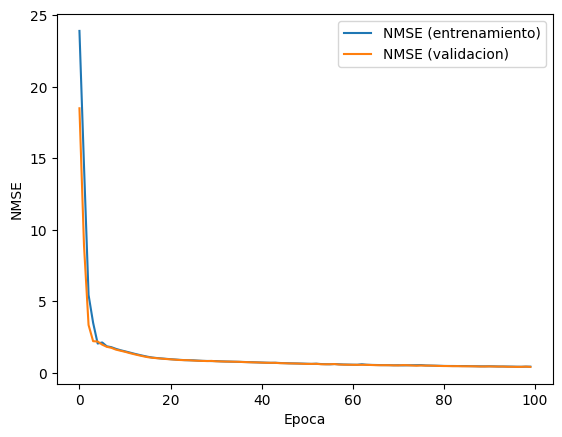

In [32]:
plt.plot(history.history['nmse'], label='NMSE (entrenamiento)')
plt.plot(history.history['val_nmse'], label='NMSE (validacion)')
plt.xlabel('Epoca')
plt.ylabel('NMSE')
plt.legend()
plt.show()

**Guardar modelo**

In [33]:
# Directorio en donde se almacenara el modelo
save_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/modelos_generados'
os.makedirs(save_dir, exist_ok=True)  # Crear el directorio si no existe

# Nombre del archivo del modelo
model_name = 'unet_model_decay_coseno_with_normalization_minmax_3.keras'

# Ruta completa del archivo
model_path = os.path.join(save_dir, model_name)

# Guardar el modelo entrenado
model.save(model_path)

Predecir señal VSC a partir de una señal PAM


# Funcion para predecir con el modelo entrenado
def predict_with_model(model, input_data):
    prediction = model.predict(input_data)
    return prediction

# Cargar una matriz de entrada para hacer una predicción 
input_matrix = X[0:1] 
# Realizar la predicción
predicted_output = predict_with_model(model, input_matrix)

# Mostrar la predicción
print("Predicción de la primera muestra de entrada:")
print(predicted_output)